In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import mplcursors as cursor 
import warnings

warnings.filterwarnings('ignore')

<h2>Preprocessing</h2>

In [2]:
weather_data = pd.read_csv("data/testset.csv")
weather_data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
weather_data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [4]:
weather_data.dtypes

datetime_utc     object
 _conds          object
 _dewptm        float64
 _fog             int64
 _hail            int64
 _heatindexm    float64
 _hum           float64
 _precipm       float64
 _pressurem     float64
 _rain            int64
 _snow            int64
 _tempm         float64
 _thunder         int64
 _tornado         int64
 _vism          float64
 _wdird         float64
 _wdire          object
 _wgustm        float64
 _windchillm    float64
 _wspdm         float64
dtype: object

In [5]:
weather_data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [6]:
weather_data.drop([' _precipm', 'datetime_utc', ' _conds', ' _wdire', ' _pressurem', ' _fog', ' _hail', ' _tornado', ' _thunder', ' _rain', ' _snow'], axis = 1, inplace = True)

In [7]:
weather_data.isnull().any()

_dewptm        True
_heatindexm    True
_hum           True
_tempm         True
_vism          True
_wdird         True
_wgustm        True
_windchillm    True
_wspdm         True
dtype: bool

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imp = SimpleImputer(strategy = 'mean')
scaler = StandardScaler()

weather_data = pd.DataFrame(imp.fit_transform(weather_data), columns = weather_data.columns)

weather_data.head()

,_dewptm,_heatindexm,_hum,_tempm,_vism,_wdird,_wgustm,_windchillm,_wspdm
0,9.0,35.65171,27.0,30.0,5.000000,280.0,37.671175,5.713817,7.400000
1,10.0,35.65171,32.0,28.0,2.402774,0.0,37.671175,5.713817,7.678463
2,11.0,35.65171,44.0,24.0,2.402774,0.0,37.671175,5.713817,7.678463
3,10.0,35.65171,41.0,24.0,2.000000,0.0,37.671175,5.713817,7.678463
4,11.0,35.65171,47.0,23.0,1.200000,0.0,37.671175,5.713817,0.000000


In [9]:
weather_data.describe()

,_dewptm,_heatindexm,_hum,_tempm,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000,100990.000000
mean,15.741205,35.651710,57.909481,25.451269,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.036852,2.694736,23.718373,8.454547,20.286111,110.889644,0.705283,0.091033,11.792032
min,-24.000000,26.800000,4.000000,1.000000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,35.651710,39.000000,19.000000,1.600000,70.000000,37.671175,5.713817,0.000000
50%,15.000000,35.651710,58.000000,27.000000,2.000000,163.549974,37.671175,5.713817,7.400000
75%,22.000000,35.651710,77.000000,32.000000,3.000000,270.000000,37.671175,5.713817,11.100000
max,75.000000,73.600000,243.000000,90.000000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [10]:
weather_data = weather_data[weather_data.apply(lambda z: np.abs(z - z.mean()) / z.std() < 3 ).all(axis = 1)]
weather_data.describe()

,_dewptm,_heatindexm,_hum,_tempm,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,97098.000000,97098.000000,97098.000000,97098.000000,97098.000000,97098.000000,97098.000000,97098.000000,97098.000000
mean,15.633439,35.501735,58.025007,25.264452,2.313213,162.954604,37.668768,5.713802,7.318472
std,6.956946,2.188718,23.733871,8.306784,1.269093,110.813789,0.040723,0.002307,6.842088
min,-5.000000,27.600000,4.000000,1.000000,0.000000,0.000000,37.000000,5.500000,0.000000
25%,10.000000,35.651710,39.000000,19.000000,1.600000,70.000000,37.671175,5.713817,0.000000
50%,15.000000,35.651710,59.000000,27.000000,2.000000,163.549974,37.671175,5.713817,7.400000
75%,22.000000,35.651710,78.000000,31.000000,3.000000,270.000000,37.671175,5.713817,11.100000
max,30.000000,43.600000,100.000000,47.000000,60.000000,390.000000,38.900000,5.800000,42.600000


In [11]:
weather_data.columns

Index([' _dewptm', ' _heatindexm', ' _hum', ' _tempm', ' _vism', ' _wdird',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [12]:
weather_data.isnull().any()

_dewptm        False
_heatindexm    False
_hum           False
_tempm         False
_vism          False
_wdird         False
_wgustm        False
_windchillm    False
_wspdm         False
dtype: bool

<h2>Visualizations</h2>

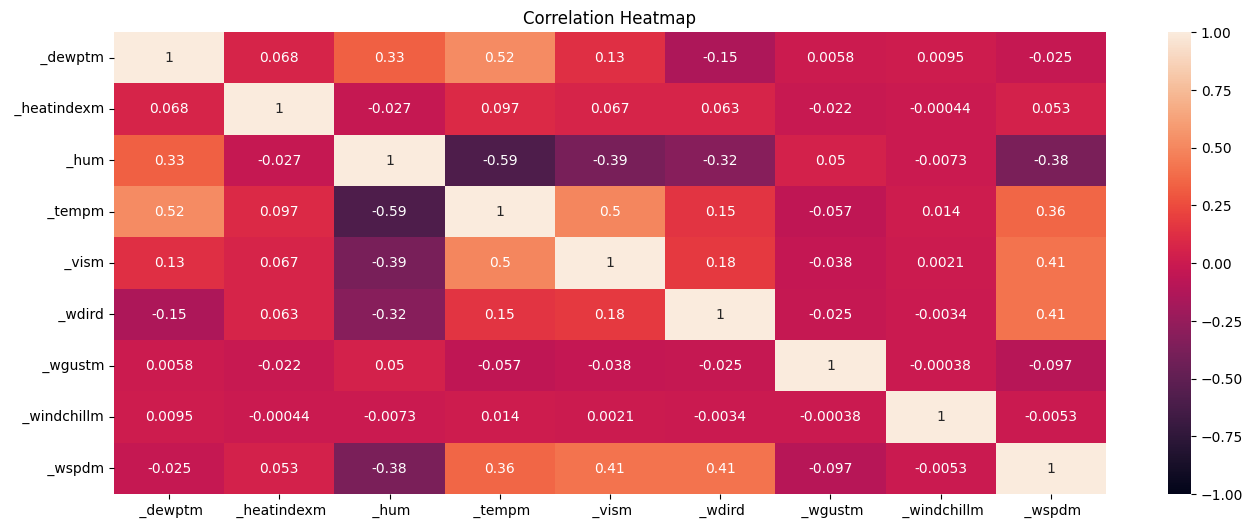

In [13]:
plt.figure(figsize = (16, 6))
sb.heatmap(data = weather_data.corr(), vmin = -1, vmax = 1, annot = True, annot_kws = {'size': 10})
plt.title('Correlation Heatmap')
plt.show()

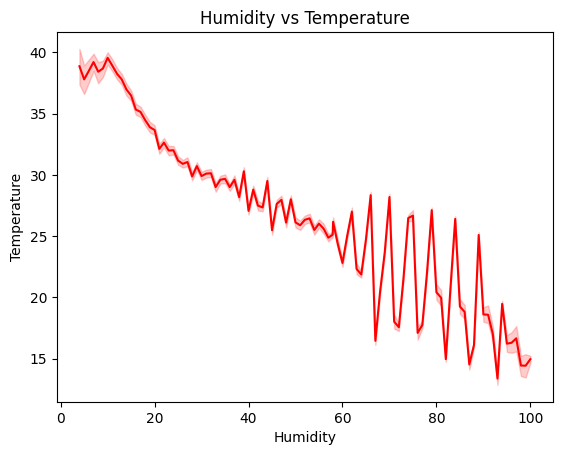

In [33]:
sb.lineplot(x = weather_data[' _hum'], y = weather_data[' _tempm'], color = 'red')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature')
plt.show()

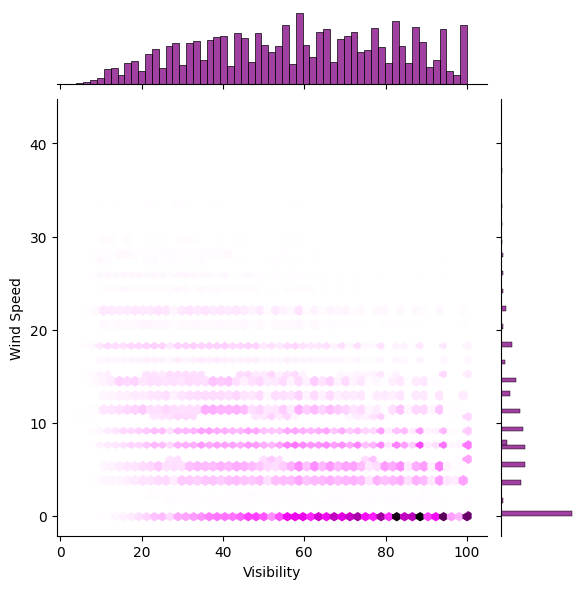

In [80]:
sb.jointplot(data = weather_data, x = ' _hum', y = ' _wspdm', kind = 'hex', color = 'purple')
plt.xlabel('Visibility')
plt.ylabel('Wind Speed')
plt.show()  

<h2>Modeling</h2>

<h4>Experiment 1</h4>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = weather_data.drop(columns = ' _tempm')
y = weather_data[' _tempm']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
linear_reg = LinearRegression()
linear_reg = linear_reg.fit(x_train, y_train)

In [19]:
reg_predictions = linear_reg.predict(x_test)
reg_predictions

array([33.78293264, 32.83904868, 14.19171697, ..., 11.79301062,
       24.91322632, 19.92092287])

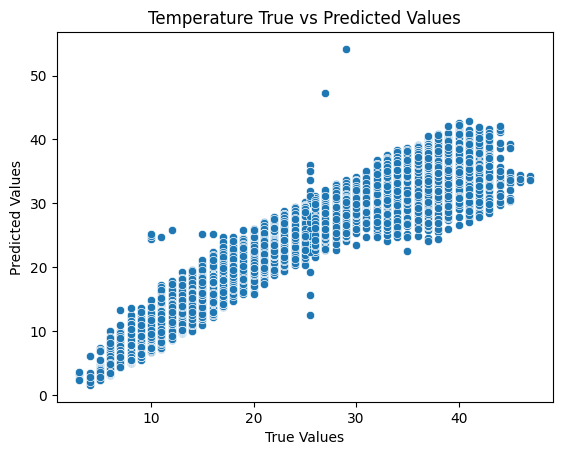

In [20]:
sb.scatterplot(x = y_test, y = reg_predictions) 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Temperature True vs Predicted Values')
cursor.cursor(hover = True).connect("add", lambda point: point.annotation.set_text(f"x: {point.target[0]}, y:{point.target[1]}"))

plt.show()

In [21]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import cross_val_score

evs = explained_variance_score(y_true = y_test, y_pred = reg_predictions)
mae = mean_absolute_error(y_true = y_test, y_pred = reg_predictions)
mse = mean_squared_error(y_true = y_test, y_pred = reg_predictions)
rmse = root_mean_squared_error(y_true = y_test, y_pred = reg_predictions)
r2 = r2_score(y_true = y_test, y_pred = reg_predictions)
cross_score = cross_val_score(estimator = linear_reg, X = X, y = y)

print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Error Score: {mae}")
print(f"Mean Squared Error Score: {mse}")
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Score Error Score: {rmse} ")
print(f"Cross Validation Scores: {cross_score}")

Explained Variance Score: 0.9205495923152514
Mean Absolute Error Score: 1.6637232489989666
Mean Squared Error Score: 5.511642346437575
R2 Score: 0.9205415781057763
Root Mean Squared Score Error Score: 2.3476887243494557 
Cross Validation Scores: [0.94563583 0.93076799 0.85560319 0.89193147 0.91381266]


<h4>Experiment 2</h4>

In [22]:
X = weather_data.drop(columns = ' _dewptm')
y = weather_data[' _dewptm']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge = ridge.fit(x_train, y_train)

In [24]:
model_predictions = ridge.predict(x_test)
model_predictions

array([23.80761675, 11.19902684, 23.37253076, ..., 18.71813082,
       11.33039081, 12.8308105 ])

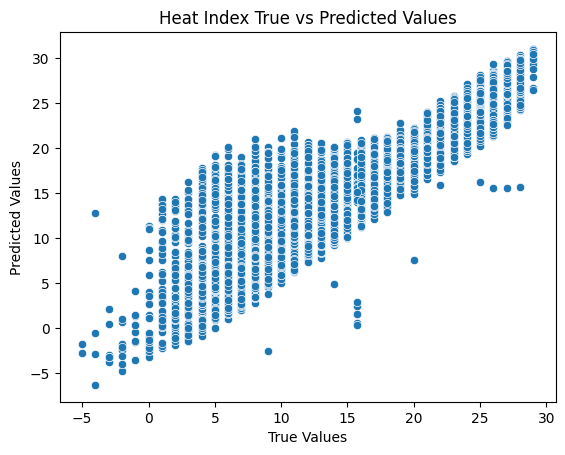

In [25]:
sb.scatterplot(x = y_test, y = model_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Heat Index True vs Predicted Values')
plt.show()

In [26]:
evs = explained_variance_score(y_true = y_test, y_pred = model_predictions)
mae = mean_absolute_error(y_true = y_test, y_pred = model_predictions)
mse = mean_squared_error(y_true = y_test, y_pred = model_predictions)
rmse = root_mean_squared_error(y_true = y_test, y_pred = model_predictions)
r2 = r2_score(y_true = y_test, y_pred = model_predictions)
cross_score = cross_val_score(estimator = ridge, X = X, y = y)

print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Error Score: {mae}")
print(f"Mean Squared Error Score: {mse}")
print(f"R2 Score: {r2}")    
print(f"Root Mean Squared Score Error Score: {rmse} ")
print(f"Cross Validation Scores: {cross_score}")

Explained Variance Score: 0.8821444460979577
Mean Absolute Error Score: 1.668593168520277
Mean Squared Error Score: 5.645991589094939
R2 Score: 0.8821349110542609
Root Mean Squared Score Error Score: 2.376129539628456 
Cross Validation Scores: [0.92967785 0.89736998 0.79895141 0.83513371 0.8315736 ]


<h4>Experiment 3</h4>

In [27]:
from sklearn.linear_model import ElasticNet

In [28]:
en = ElasticNet()
X = weather_data.drop(columns = ' _hum')
y = weather_data[' _hum']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [29]:
en = en.fit(x_train, y_train)

In [30]:
y_predictions = en.predict(x_test)
y_predictions

array([63.72611092, 73.19305034, 67.29372243, ..., 83.84773195,
       21.7339116 , 53.24215114])

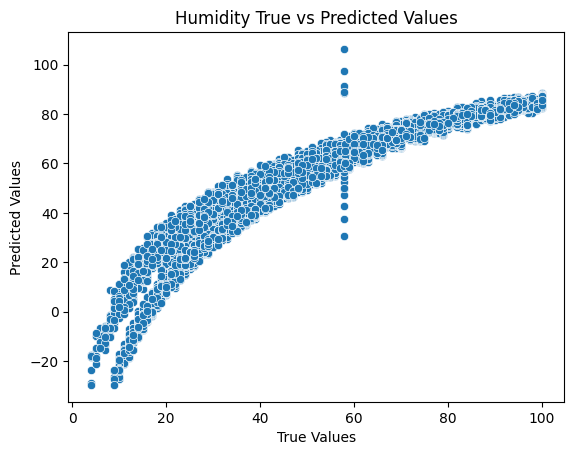

In [31]:
sb.scatterplot(x = y_test, y = y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Humidity True vs Predicted Values') 
plt.show()

In [32]:
evs = explained_variance_score(y_true = y_test, y_pred = y_predictions)
mae = mean_absolute_error(y_true = y_test, y_pred = y_predictions)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictions)
rmse = root_mean_squared_error(y_true = y_test, y_pred = y_predictions)
r2 = r2_score(y_true = y_test, y_pred = y_predictions)
cross_score = cross_val_score(estimator = en, X = X, y = y)

print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Error Score: {mae}")
print(f"Mean Squared Error Score: {mse}")
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Score Error Score: {rmse} ")
print(f"Cross Validation Scores: {cross_score}")

Explained Variance Score: 0.8939382287586265
Mean Absolute Error Score: 5.966088764453436
Mean Squared Error Score: 60.10976812935002
R2 Score: 0.8939373171131547
Root Mean Squared Score Error Score: 7.753048956981377 
Cross Validation Scores: [0.90866204 0.91365111 0.87595486 0.84298351 0.86113673]
